In [1]:
import sys, os
sys.path.append(os.path.abspath('../'))

from os import listdir
import pandas as pd
import numpy as np
import utils
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER = '../../dataset/'
NFFT_DATA = [ 4096, 32768 ]
FS_DATA = [ 8192, 32768, 65536 ]

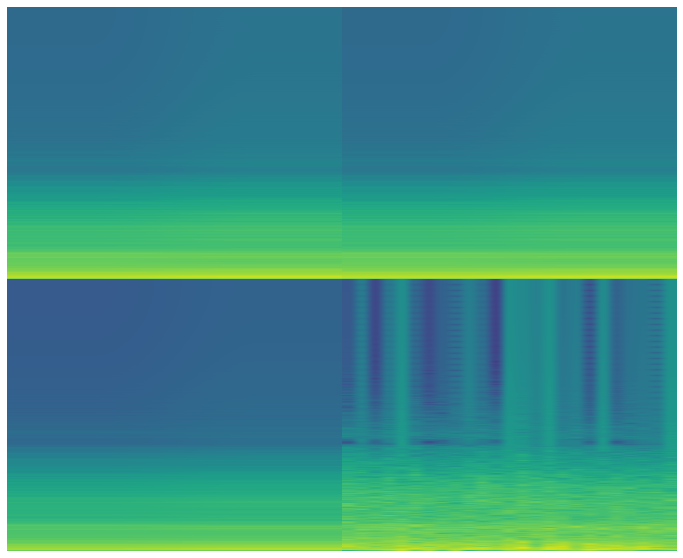

In [20]:
subject_filenames = utils.find_csv_filenames(DATA_FOLDER)

name = subject_filenames[0]
df = utils.load_data(name)

# Spectrogram이 Series 형태로 만들어짐
f3 = df.pop("F3").to_numpy()
f3 = f3.reshape(-1,)

fig = plt.figure(figsize=(12, 10))
fig.subplots_adjust(hspace=0, wspace=0)

# 생성되는 Spectrogram plot으로 찍어보기
ax1 = fig.add_subplot(2, 2, 1)
ax1.specgram(f3, NFFT=NFFT_DATA[1], Fs=FS_DATA[2], noverlap=int(NFFT_DATA[1] / 4))
ax1.axis('off')

ax2 = fig.add_subplot(2, 2, 2)
ax2.specgram(f3, NFFT=NFFT_DATA[1], Fs=FS_DATA[1], noverlap=int(NFFT_DATA[1] / 4))
ax2.axis('off')

ax3 = fig.add_subplot(2, 2, 3)
ax3.specgram(f3, NFFT=NFFT_DATA[1], Fs=FS_DATA[2], noverlap=int(NFFT_DATA[1] / 32))
ax3.axis('off')

ax4 = fig.add_subplot(2, 2, 4)
ax4.specgram(f3, NFFT=NFFT_DATA[0], Fs=FS_DATA[0], noverlap=int(NFFT_DATA[0] / 4))
ax4.axis('off')

plt.savefig('image.png')
plt.show()

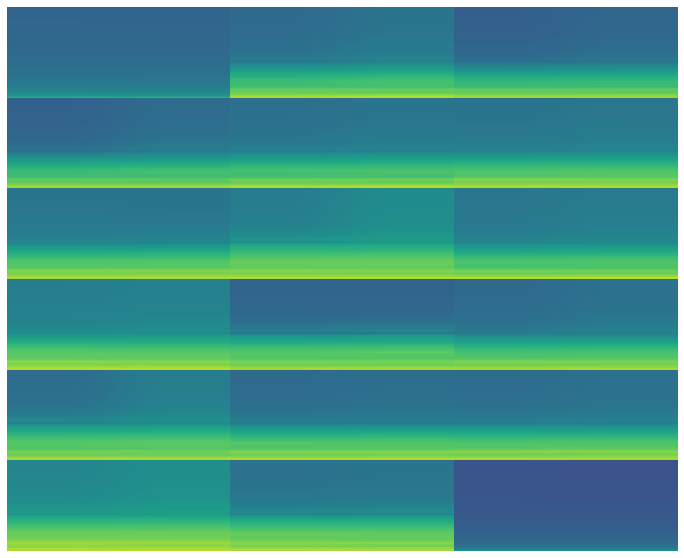

In [23]:
subject_filenames = utils.find_csv_filenames(DATA_FOLDER)

name = subject_filenames[0]
df = utils.load_data(name)

fig = plt.figure(figsize=(12, 10))
fig.subplots_adjust(hspace=0, wspace=0)

# axis와 subplots_adjust로 공백 및 축 삭제
for i in range(df.shape[1]-1):
    ax = fig.add_subplot(6, 3, i+1)
    ax.specgram(df.iloc[:, i], NFFT=NFFT_DATA[1], Fs=FS_DATA[2], noverlap=int(NFFT_DATA[1] / 4))
    ax.axis('off')

plt.savefig('image.png')